# Loan Approval Prediction: 
### EDA + Decision Tree, Random Forest & Logistic Regression Modeling


### Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 



 ###  In total, there are **1440** observations (rows) and each observation represents an employee. There are **13** variables (columns) and below are the variables contained in the dataset:

In [15]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [29]:
#Reading the dataset

train_df = pd.read_csv('loan approval data.csv')
test_df = pd.read_csv('test_feature_construction.csv')

In [30]:
print(train_df.shape)
print(test_df.shape)

(1212, 13)
(228, 13)


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1212 non-null   object 
 1   Gender             1199 non-null   object 
 2   Married            1209 non-null   object 
 3   Dependents         1185 non-null   object 
 4   Education          1212 non-null   object 
 5   Self_Employed      1180 non-null   object 
 6   ApplicantIncome    1212 non-null   int64  
 7   CoapplicantIncome  1212 non-null   float64
 8   LoanAmount         1169 non-null   float64
 9   Loan_Amount_Term   1184 non-null   float64
 10  Credit_History     1113 non-null   float64
 11  Property_Area      1212 non-null   object 
 12  Loan_Status        1212 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 123.2+ KB


In [32]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           27
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           43
Loan_Amount_Term     28
Credit_History       99
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1212.000000,1212.000000,1169.000000,1184.000000,1113.000000
mean,5348.589934,1626.305148,145.699743,341.959459,0.842767
std,5959.855470,2938.424771,84.143680,65.135103,0.364184
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,127.000000,360.000000,1.000000
75%,5780.000000,2306.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
print('Training-->')
print(train_df.columns)
print('Testing-->')
print(test_df.columns)

Training-->
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Testing-->
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [34]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
train_df.shape

(1212, 13)

#  Exploratory Data Analysis (EDA)

## Univariate Analysis

In [10]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. Analaysis on Loan_Status col

In [40]:
train_df['Loan_Status'].value_counts()

Loan_Status
Y    833
N    379
Name: count, dtype: int64

### Percentage of Loan approval status as Approved or not 

In [39]:
train_df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729373
N    31.270627
Name: proportion, dtype: float64

> *So there were more loan approved than loan rejection.*

## 2. Analaysis on Gender col

In [36]:
train_df['Gender'].value_counts()

Gender
Male      976
Female    223
Name: count, dtype: int64

### Percentage of Loan approval for Male and Female

In [38]:
train_df['Gender'].value_counts(normalize=True)*100

Gender
Male      81.401168
Female    18.598832
Name: proportion, dtype: float64

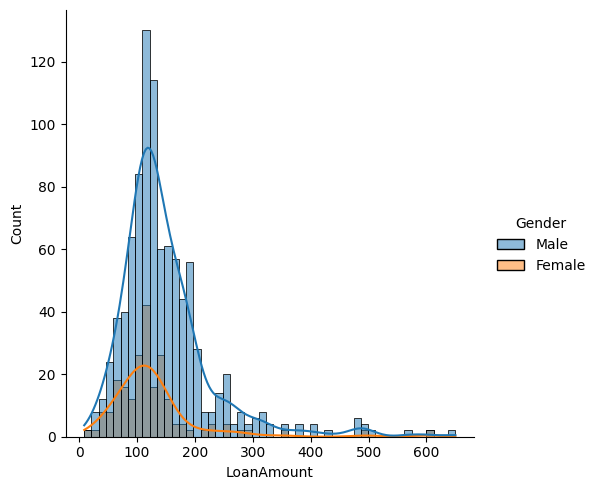

In [15]:
sns.displot(x='LoanAmount', hue='Gender', data=train_df, kde=True)

> *There were more Male than Female asking for Loan.*

3. Analaysis on Married col

In [41]:
train_df['Married'].value_counts()

Married
Yes    786
No     423
Name: count, dtype: int64

### Percentage of Loan approval for Married and Non-Married people

In [42]:
train_df['Married'].value_counts(normalize=True)*100

Married
Yes    65.012407
No     34.987593
Name: proportion, dtype: float64

In [18]:
(train_df['Married']=='Yes') & (train_df['Loan_Status']=='Y')

0       False
1       False
2        True
3        True
4       False
        ...  
1207    False
1208     True
1209     True
1210     True
1211    False
Length: 1212, dtype: bool

> *> *Here, data is implies that Married people are more likely to get approved for Loan.**

## 4. Analaysis on Dependents col

In [43]:
train_df['Dependents'].value_counts()

Dependents
0     683
1     203
2     200
3+     51
3      48
Name: count, dtype: int64

In [44]:
train_df['Dependents'].value_counts(normalize=True)*100

Dependents
0     57.637131
1     17.130802
2     16.877637
3+     4.303797
3      4.050633
Name: proportion, dtype: float64

## 5. Analaysis on Education col

In [45]:
train_df['Education'].value_counts()

Education
Graduate        945
Not Graduate    267
Name: count, dtype: int64

In [46]:
train_df['Education'].value_counts(normalize=True)*100

Education
Graduate        77.970297
Not Graduate    22.029703
Name: proportion, dtype: float64

## 6. Analaysis on Property_Area col

In [48]:
train_df['Property_Area'].value_counts()

Property_Area
Semiurban    458
Urban        400
Rural        354
Name: count, dtype: int64

In [47]:
train_df['Property_Area'].value_counts(normalize=True)*100

Property_Area
Semiurban    37.788779
Urban        33.003300
Rural        29.207921
Name: proportion, dtype: float64

## Bivariate Analysis

In [49]:
train_df[(train_df['Married']=='Yes') & (train_df['Loan_Status']=='Y')]['Gender'].value_counts(normalize=True)*100

Gender
Male      91.756272
Female     8.243728
Name: proportion, dtype: float64

In [50]:
train_df[(train_df['Married']=='No') & (train_df['Loan_Status']=='Y')]['Gender'].value_counts(normalize=True)*100

Gender
Male      61.363636
Female    38.636364
Name: proportion, dtype: float64

> *This dataset consist of ~81% Male, but for Married couple ~91% of loan taker are Male jumping from ~61% Male in Non Married Category.*

In [23]:
Graduate_approval_percentage = train_df[train_df['Education']=='Graduate']['Loan_Status'].value_counts(normalize=True)
Non_Graduate_approval_percentage = train_df[train_df['Education']=='Not Graduate']['Loan_Status'].value_counts(normalize=True)
print(Graduate_approval_percentage)
print(Non_Graduate_approval_percentage)

Loan_Status
Y    0.707937
N    0.292063
Name: proportion, dtype: float64
Loan_Status
Y    0.614232
N    0.385768
Name: proportion, dtype: float64


> *Being a graduate, your Loan Approval percentage jumps by ~10%.*

Self_Employed
No     988
Yes    192
Name: count, dtype: int64


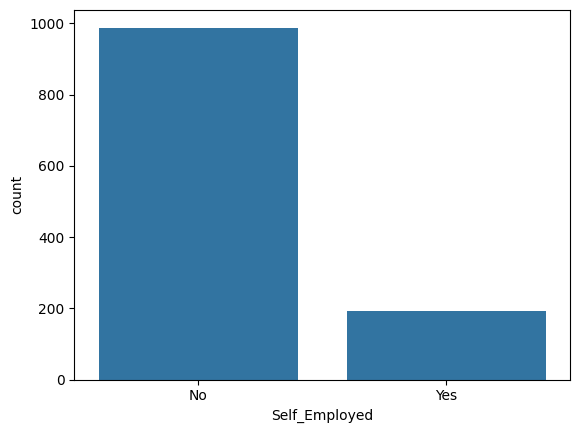

In [24]:
sns.countplot(x='Self_Employed', data=train_df)
print(train_df['Self_Employed'].value_counts())

Self Employed------>
Loan_Status
Y    0.682292
N    0.317708
Name: proportion, dtype: float64
Self UnEmployed------>
Loan_Status
Y    0.687247
N    0.312753
Name: proportion, dtype: float64


<Axes: xlabel='Loan_Status', ylabel='count'>

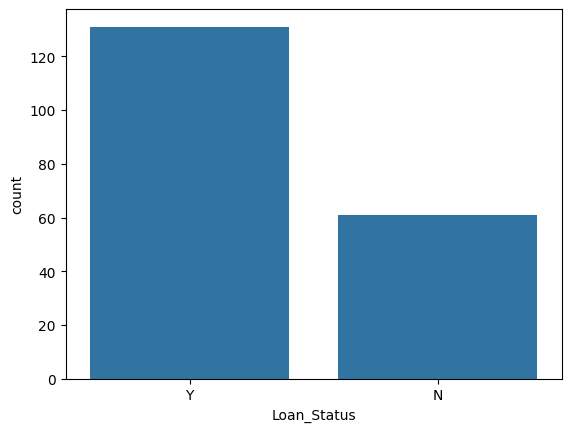

In [25]:
Self_Employed = train_df[train_df['Self_Employed']=='Yes']
Self_UnEmployed = train_df[train_df['Self_Employed']=='No']
print('Self Employed------>')
print(Self_Employed['Loan_Status'].value_counts(normalize=True))
print('Self UnEmployed------>')
print(Self_UnEmployed['Loan_Status'].value_counts(normalize=True))
sns.countplot(x='Loan_Status', data=Self_Employed)


<Axes: xlabel='Loan_Status', ylabel='count'>

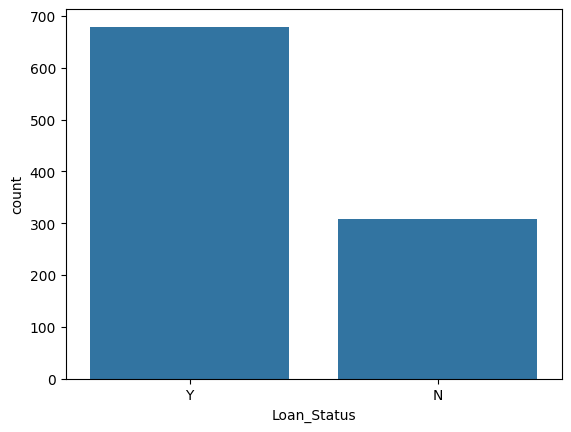

In [26]:
sns.countplot(x='Loan_Status', data=Self_UnEmployed)

> *Not much differnce approval acceptance whether one is Employed or not.*

In [27]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

> *Those Term are listed in months, i will be dividing by 12 so that it will be readable.*

In [29]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term']/12


In [30]:
train_df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
30.0    1012
15.0      87
40.0      29
25.0      25
7.0        8
20.0       7
10.0       6
5.0        4
3.0        4
1.0        2
Name: count, dtype: int64

In [31]:
train_df['Loan_Amount_Term'].value_counts(normalize=True)

Loan_Amount_Term
30.0    0.854730
15.0    0.073480
40.0    0.024493
25.0    0.021115
7.0     0.006757
20.0    0.005912
10.0    0.005068
5.0     0.003378
3.0     0.003378
1.0     0.001689
Name: proportion, dtype: float64

In [32]:
train_df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True)

Loan_Amount_Term  Loan_Status
1.0               Y              1.000000
3.0               N              1.000000
5.0               Y              1.000000
7.0               Y              0.750000
                  N              0.250000
10.0              Y              1.000000
15.0              Y              0.655172
                  N              0.344828
20.0              Y              0.714286
                  N              0.285714
25.0              Y              0.600000
                  N              0.400000
30.0              Y              0.702569
                  N              0.297431
40.0              N              0.620690
                  Y              0.379310
Name: proportion, dtype: float64

In [33]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y


In [34]:
train_df['Credit_History'].value_counts(normalize=True)

Credit_History
1.0    0.842767
0.0    0.157233
Name: proportion, dtype: float64

In [35]:
train_df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.920000
                Y              0.080000
1.0             Y              0.795309
                N              0.204691
Name: proportion, dtype: float64

> *People who has good credit and has met guidelance has ~80% of receiving a loan.While if one has'nt paid to guidelines, one has only ~8% of getting a Loan.So credit history really plays an important role.*

In [36]:
train_df['Property_Area'].value_counts(normalize=True)

Property_Area
Semiurban    0.377888
Urban        0.330033
Rural        0.292079
Name: proportion, dtype: float64

In [37]:
train_df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True)

Property_Area  Loan_Status
Rural          Y              0.615819
               N              0.384181
Semiurban      Y              0.768559
               N              0.231441
Urban          Y              0.657500
               N              0.342500
Name: proportion, dtype: float64

> *According to RBI website: Based on the size of the population, a centre, where bank branch is located, is classified either into rural, semi-urban, urban, or metropolitan as under: Rural: population less than 10,000. Semi-Urban: 10,000 and above and less than 1 lakh. Urban: 1 lakh and above and less than 10 lakh.*

> *Though Urban and SemiUrban has better loan acceptance rating, this could be due to the fact that Bank are more likely to give Loan and the dataset has more instances from Urban and SemiUrban.*

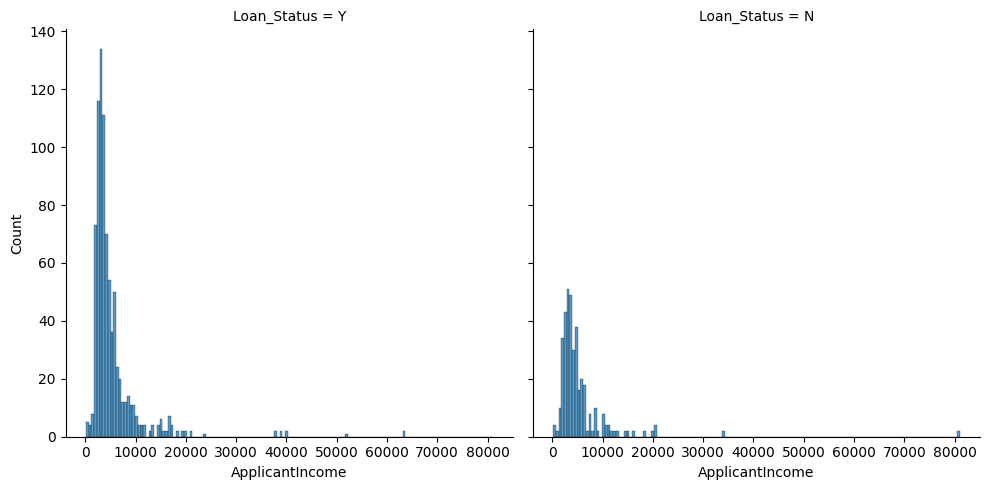

In [38]:
sns.displot(x='ApplicantIncome', data=train_df, col='Loan_Status')

In [39]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y


In [40]:
train_df['Dependents'].value_counts(normalize=True)

Dependents
0     0.576371
1     0.171308
2     0.168776
3+    0.043038
3     0.040506
Name: proportion, dtype: float64

In [41]:
train_df.groupby('Dependents')['Loan_Status'].value_counts(normalize=True)

Dependents  Loan_Status
0           Y              0.691069
            N              0.308931
1           Y              0.645320
            N              0.354680
2           Y              0.760000
            N              0.240000
3           Y              0.625000
            N              0.375000
3+          Y              0.647059
            N              0.352941
Name: proportion, dtype: float64

> *No clearly indication that 'Dependents' effects Loan Status.*

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

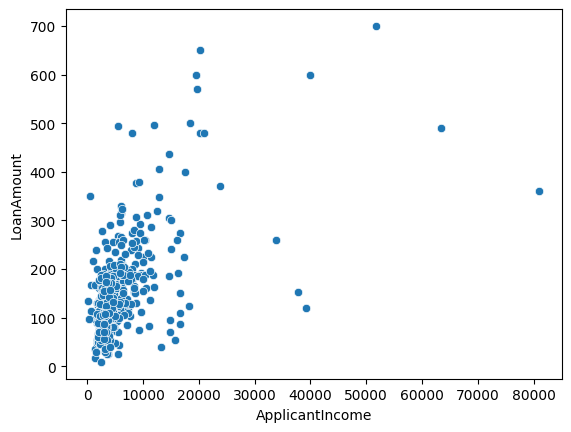

In [11]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train_df)

In [ ]:
train_df.shape

(1212, 13)

## Imputing the missing values (KNN Imputer)

In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           27
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           43
Loan_Amount_Term     28
Credit_History       99
Property_Area         0
Loan_Status           0
dtype: int64

### Imputing the null values in Credit_History,LoanAmount,Self_Employed column using the KKN Imputer

In [6]:
# Imputing the KNN Imputer
from sklearn.impute import KNNImputer

In [13]:
imputer=KNNImputer(n_neighbors=15)


0
0    985
1    211
2     14
3      2
Name: count, dtype: int64

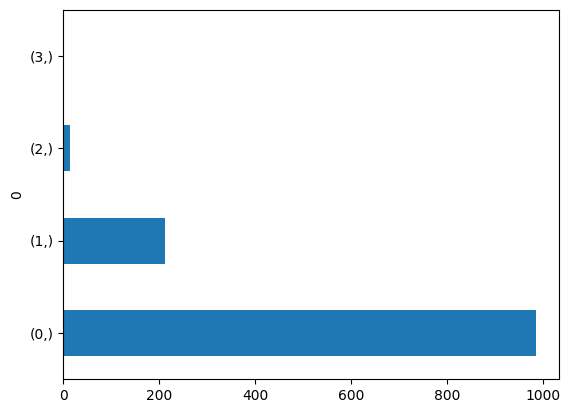

In [ ]:
#Checking missing values via row
train_df=pd.DataFrame(imputer.fit_transform(train_df),columns=[Credit_History,Self_Employed,LoanAmount ,LoanAmount].columns)
Row_with_missing_values = pd.DataFrame(train_df.isnull().sum(axis=1))
Row_with_missing_values.value_counts().plot(kind='barh')
Row_with_missing_values.value_counts()


0
0    178
1     44
2      5
3      1
Name: count, dtype: int64

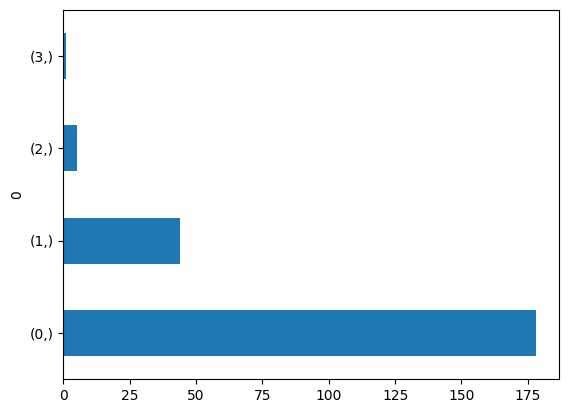

In [ ]:

Row_with_missing_values = pd.DataFrame(test_df.isnull().sum(axis=1))
Row_with_missing_values.value_counts().plot(kind='barh')
Row_with_missing_values.value_counts()


In [ ]:
#Function for Checking Null Values of Dataset and showing graph 


def Null_Analysis(df):    
    columns_with_nullValues =  df.columns[df.isnull().any()] 
    columns_with_nullValues_count=  df[columns_with_nullValues].isnull().sum() 
    columns_with_nullValues_count_percentage= df[columns_with_nullValues].isnull().sum() * 100 / df.shape[0] 



    NullValues_Result = pd.concat([columns_with_nullValues_count,columns_with_nullValues_count_percentage], axis=1,join='inner') 
    NullValues_Result.columns = ['Count', 'Percentage'] 
    NullValues_Result['Percentage'] = round(NullValues_Result['Percentage'],2) 
    NullValues_Result
    return NullValues_Result
    
def Null_Analysis_Graph(df):
    NullValues_Result= Null_Analysis(df)
    NullValues_Result['Percentage'].hist(bins=10)
    plt.xlabel('Missing Values Percentages')
    plt.ylabel('Frequency')
    plt.title('Histogram of Missing Values Percentages')
    plt.show()


In [ ]:
Null_Analysis(train_df)

,Count,Percentage
Gender,13,1.07
Married,3,0.25
Dependents,27,2.23
Self_Employed,32,2.64
LoanAmount,43,3.55
Loan_Amount_Term,28,2.31
Credit_History,99,8.17


> *Note that training dataset has 614 instances and 13 features(including target variable).*

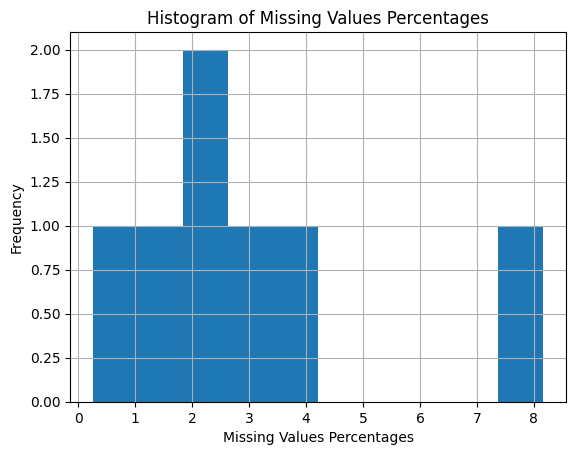

In [ ]:
Null_Analysis_Graph(train_df)

In [ ]:
Null_Analysis(test_df)

,Count,Percentage
Gender,4,1.75
Married,1,0.44
Dependents,4,1.75
Self_Employed,12,5.26
LoanAmount,10,4.39
Loan_Amount_Term,9,3.95
Credit_History,17,7.46


>*Note that testing instance has 367 instances.*

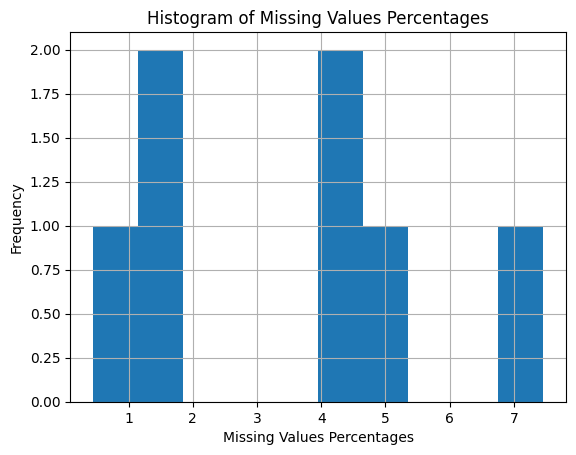

In [ ]:
Null_Analysis_Graph(test_df)

In [ ]:
Null_Analysis(train_df)

,Count,Percentage
Gender,13,1.07
Married,3,0.25
Dependents,27,2.23
Self_Employed,32,2.64
LoanAmount,43,3.55
Loan_Amount_Term,28,2.31
Credit_History,99,8.17


In [ ]:
train_df['Credit_History'].value_counts()

Credit_History
1.0    938
0.0    175
Name: count, dtype: int64

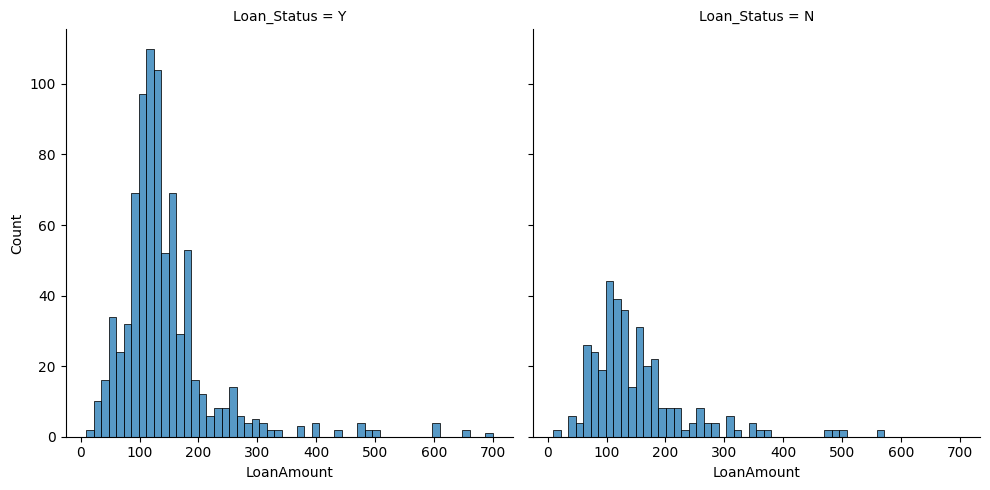

In [ ]:
sns.displot(x='LoanAmount', data=train_df, col='Loan_Status')

<Axes: xlabel='LoanAmount'>

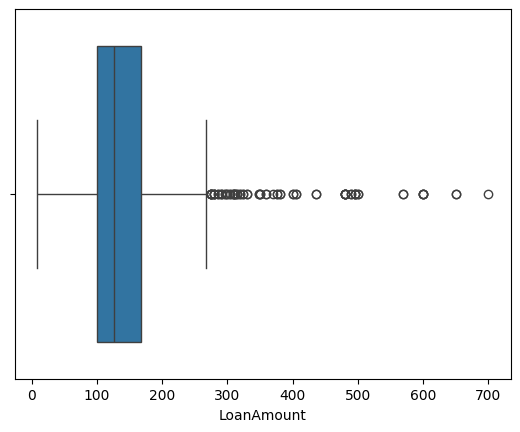

In [ ]:
sns.boxplot(x='LoanAmount', data=train_df)

In [ ]:
train_df['LoanAmount'].describe()

count    1169.000000
mean      145.699743
std        84.143680
min         9.000000
25%       100.000000
50%       127.000000
75%       168.000000
max       700.000000
Name: LoanAmount, dtype: float64

> *Note that this 'LoanAmount' listed are in thousands.*

# > *EDA implications*

> *1.So there were more loan approved than loan rejection.\
2.Statistically, Gender does'nt effect your loan approval chances.\
3.There were more Male than Female asking for Loan.\
4.Here, data is implies that Married people are more likely to get approved for Loan.\
5.This dataset consist of ~81% Male, but for Married couple ~91% of loan taker are Male jumping from ~61% Male in Non Married Category.\
6.Being a graduate, your Loan Approval percentage jumps by ~10%.\
7.Not much differnce approval acceptance whether one is Employed or not.\
8.People who has good credit and has met guidelance has ~80% of receiving a loan.While if one has'nt paid to guidelines, one has only ~8% of getting a Loan.So credit history really plays an important role.\
9.Though Urban and SemiUrban has better loan acceptance rating, this could be due to the fact that Bank are more likely to give Loan and the dataset has more instances from Urban and SemiUrban.\
10.No clearly indication that 'Dependents' effects Loan Status.*

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1212 non-null   object 
 1   Gender             1199 non-null   object 
 2   Married            1209 non-null   object 
 3   Dependents         1185 non-null   object 
 4   Education          1212 non-null   object 
 5   Self_Employed      1180 non-null   object 
 6   ApplicantIncome    1212 non-null   int64  
 7   CoapplicantIncome  1212 non-null   float64
 8   LoanAmount         1169 non-null   float64
 9   Loan_Amount_Term   1184 non-null   float64
 10  Credit_History     1113 non-null   float64
 11  Property_Area      1212 non-null   object 
 12  Loan_Status        1212 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 123.2+ KB


In [46]:
test_df.isnull().sum().sum()

57

In [ ]:
train_df.isnull().sum().sum()

245

In [43]:
# store columns with specific data type
integer_columns = train_df.select_dtypes(include=['int64']).columns
float_columns = train_df.select_dtypes(include=['float64']).columns
object_columns = train_df.select_dtypes(include=['object']).columns

print("No of Integer type columns: {}".format(len(integer_columns)))
print("No of Float type columns: {}".format(len(float_columns)))
print("No of String type columns: {}".format(len(object_columns)))

No of Integer type columns: 1
No of Float type columns: 4
No of String type columns: 8


In [ ]:
print(object_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [64]:
Loan_Status=train_df.iloc[:,-1]

In [94]:
df = pd.read_csv('loan approval data.csv')

## SMOTE for imbalance correction

### We use Synthetic Minority Over-sampling Technique (SMOTE) to balance our dataset by generating synthetic samples for the minority class.

#After running the below line of code, X and y will be modified to include the synthetic samples generated by SMOTE, resulting in a balanced dataset. This can be particularly useful when you're training a machine learning model and want to avoid bias towards the majority class.

### Here's a brief summary of what SMOTE does:

#### It identifies the minority class samples that are most at risk of being misclassified.
#### For each of these minority samples, it selects one or more of its nearest neighbors.
#### It generates synthetic samples along the line segments that connect the minority sample and its selected neighbors.
#### The number of synthetic samples generated is determined by the extent to which we want to balance the dataset.

In [ ]:
X=train_df.drop('Loan_Status',axis=1)
y=train_df['Loan_Status']
key=X.keys()
X.head()
smote=SMOTE()
X,y=smote.fit_resample(X,y)

# Now ,Feature Construction Using KNN

### Print the column names to check which columns exist in the DataFrame

In [92]:
print("Columns in the dataset:", df.columns.tolist())

Columns in the dataset: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income', 'Loan_Income_Ratio', 'Risk_Cluster', 'Risk_Probability']


### Define columns to drop

In [95]:
Loan_Status=df.iloc[:,-1]
columns_to_drop = ['Loan_ID','Loan_Status']

### Drop only the columns that exist

In [96]:
df.drop(columns_to_drop, axis=1, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['Loan_ID', 'Loan_Status']


### Step 1: Data Preprocessing

#### Fill missing values for categorical columns with mode and numerical columns with median

In [98]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area', 'Education']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


### Impute missing categorical values with mode

In [99]:
for col in cat_cols:
    if col in df.columns:  # Check if the column exists
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\saura\AppData\Local\Temp\ipykernel_37748\3910101574.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### Impute missing numerical values with median

In [100]:
for col in num_cols:
    if col in df.columns:  # Check if the column exists
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\saura\AppData\Local\Temp\ipykernel_37748\2401430449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\saura\AppData\Local\Temp\ipykernel_37748\2401430449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### Step 2: Feature Engineering

### Select features for clustering

In [101]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

### Standardize features


In [102]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Determine the optimal number of clusters using the Elbow method

In [103]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

#### Plotting the Elbow graph

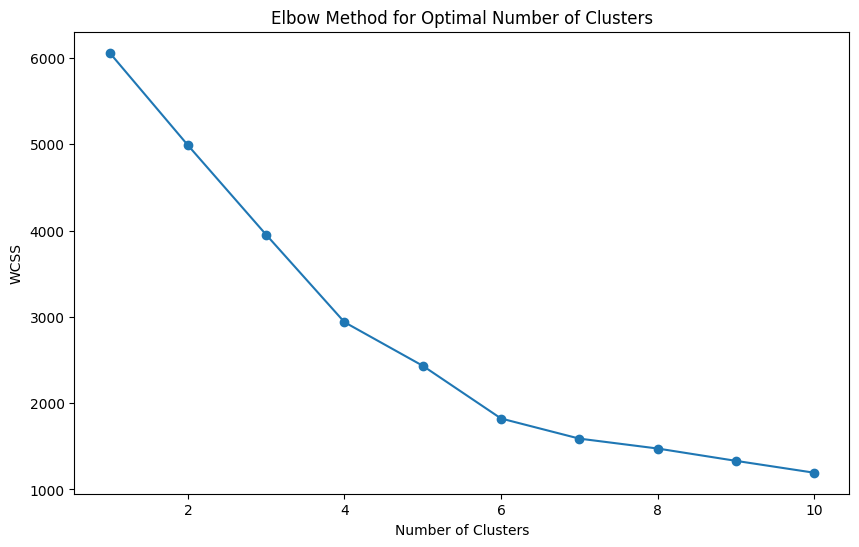

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Use 10 clusters for more granular risk segmentation

In [105]:
kmeans = KMeans(n_clusters=10, random_state=42)
df['Risk_Cluster'] = kmeans.fit_predict(features_scaled)

### Assign estimated probabilities based on risk levels
##### Assign probabilities in descending order: Cluster 0 (Low Risk) = High Probability, Cluster 9 (High Risk) = Low Probability

In [106]:
risk_mapping = {
    0: 0.95,  # Lowest risk cluster, highest approval probability
    1: 0.85,
    2: 0.75,
    3: 0.65,
    4: 0.55,
    5: 0.45,
    6: 0.35,
    7: 0.25,
    8: 0.15,
    9: 0.05  # Highest risk cluster, lowest approval probability
}
df['Risk_Probability'] = df['Risk_Cluster'].map(risk_mapping)

### Step 4: Visualization and Analysis
#### Visualize the clusters

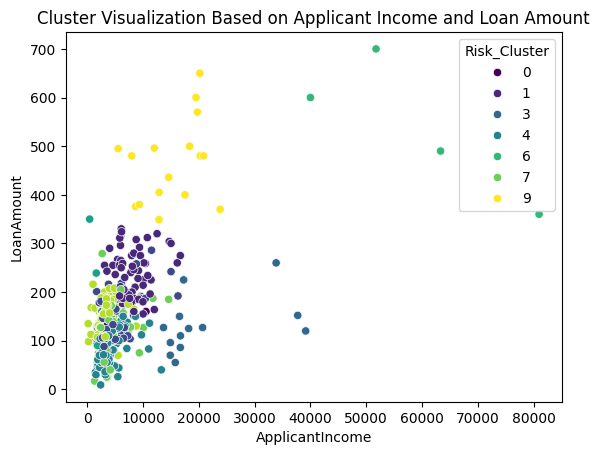

In [107]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Risk_Cluster', palette='viridis')
plt.title('Cluster Visualization Based on Applicant Income and Loan Amount')
plt.show()

#### Check the distribution of the Risk Probability

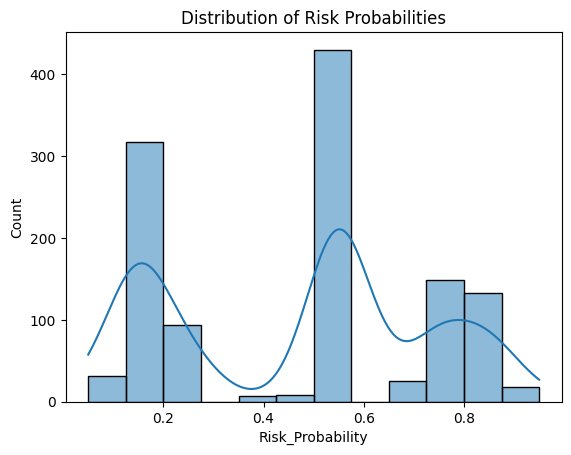

In [108]:
sns.histplot(df['Risk_Probability'], kde=True)
plt.title('Distribution of Risk Probabilities')
plt.show()

In [109]:

# Save the modified dataset
df.to_csv('loan_data_with_risk.csv', index=False)

In [110]:
dd=pd.read_csv('loan_data_with_risk.csv')

In [111]:
Loan_Status

0       Y
1       N
2       Y
3       Y
4       Y
       ..
1207    Y
1208    Y
1209    Y
1210    Y
1211    N
Name: Loan_Status, Length: 1212, dtype: object

In [112]:
dd['Loan_Status']=Loan_Status

### Save the modified dataset

In [113]:
dd.to_csv('final_dataset.csv', index=False)